## Preprocessing

In [39]:
# Import our dependencies
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [40]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [41]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()
print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [42]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df["APPLICATION_TYPE"].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [43]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# In dataset of 34299, iIf the application_type value appears less than 342 times (< 1%), then re-categorize as 'Other'.
application_types_to_replace = application_type_counts[application_type_counts < 342].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [44]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df["CLASSIFICATION"].value_counts()

In [45]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [46]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_counts[classification_counts < 1000].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [47]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=int)

# Remove redundant column for a two-dimensional feature
application_df = application_df.drop(columns = ["SPECIAL_CONSIDERATIONS_N"])
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34299 non-null  int64
 1   ASK_AMT                       34299 non-null  int64
 2   IS_SUCCESSFUL                 34299 non-null  int64
 3   APPLICATION_TYPE_Other        34299 non-null  int64
 4   APPLICATION_TYPE_T10          34299 non-null  int64
 5   APPLICATION_TYPE_T19          34299 non-null  int64
 6   APPLICATION_TYPE_T3           34299 non-null  int64
 7   APPLICATION_TYPE_T4           34299 non-null  int64
 8   APPLICATION_TYPE_T5           34299 non-null  int64
 9   APPLICATION_TYPE_T6           34299 non-null  int64
 10  APPLICATION_TYPE_T7           34299 non-null  int64
 11  APPLICATION_TYPE_T8           34299 non-null  int64
 12  AFFILIATION_CompanySponsored  34299 non-null  int64
 13  AFFILIATION_Family/Parent     3

In [48]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns = ["IS_SUCCESSFUL"])
y = application_df["IS_SUCCESSFUL"].values.reshape(-1,1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [49]:
# View split data
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display(X_train)
display(X_test)

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
15029,1,1725423,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
22784,1,5000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
13575,1,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
22153,1,5000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
17052,1,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27743,1,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
24452,1,5000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1404,1,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
27605,1,5000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
13819,1,5000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
11871,1,5000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
7623,1,5000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
15101,1,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2266,1,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26936,1,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
21187,1,5000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
19110,1,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
645,1,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [50]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# View
display(X_train_scaled)
display(X_test_scaled)

array([[ 0.01079982, -0.01334191, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687],
       [ 0.01079982, -0.03089076, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687],
       [ 0.01079982, -0.03089076, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687],
       ...,
       [ 0.01079982, -0.03089076, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687],
       [ 0.01079982, -0.03089076, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687],
       [ 0.01079982, -0.02964949, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687]])

array([[ 0.01079982, -0.03089076, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687],
       [ 0.01079982, -0.03089076, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687],
       [ 0.01079982, -0.03089076, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687],
       ...,
       [ 0.01079982, -0.03089076, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687],
       [ 0.01079982, -0.03089076, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687],
       [ 0.01079982, -0.03089076, -0.08984839, ..., -0.06462905,
        -0.07397412, -0.02925687]])

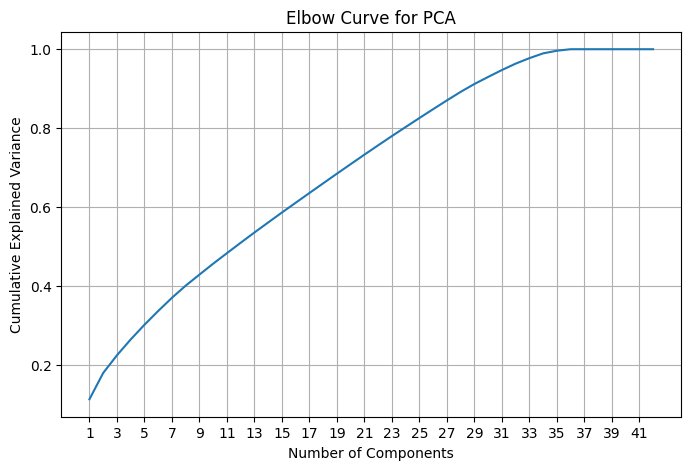

<Figure size 640x480 with 0 Axes>

In [51]:
# Check the PCA elbow curve
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA() # Do not specify number of components since we'll check elbow curve first
X_train_pca = pca.fit(X_train_scaled) # Apply PCA to only the training subset

cumulative_variance = np.cumsum(pca.explained_variance_ratio_) # Calculate the cumulative explained variance

# Graph an elbow curve for the explained variance
plt.figure(figsize=(8, 5))
plt.plot(
  range(1, len(cumulative_variance) + 1),
  cumulative_variance,
)

plt.xlabel('Number of Components')
plt.xticks(range(1, len(cumulative_variance) + 1, 2))
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Curve for PCA')
plt.grid(True)
plt.show()

plt.savefig("pca_elbow_curve.png")

In [52]:
# Based on the eblow curve, apply PCA with 34 components
pca = PCA(n_components=34)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [53]:
# Confirm the dimensionality of X-train_scaled
print(X_train_pca.shape)

(25724, 34)


## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.activations import elu

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation = "relu", input_dim=34, name = "first_hidden_layer"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=4, activation = "relu", name = "second_hidden_layer"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = "sigmoid", name = "output_layer"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_hidden_layer (Dense)           │ (None, 16)                  │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_hidden_layer (Dense)          │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 633 (2.47 KB)

 Trainable params: 633 (2.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
# Use an EarlyStopping callback to stop the trial if accuracy does not improve after certain number of epochs
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor = "accuracy",  # Monitor the accuracy
    mode = "max", # Maximize the accuracy
    verbose = 1, # Print the results
    patience = 5, # Number of epochs with no improvement before stopping
    restore_best_weights = True # Restore the best weights after stopping
)

# Train the model
nn_fitted = nn.fit(
    X_train_pca,
    y_train,
    epochs = 100,
    callbacks = [early_stopping]
)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5559 - loss: 0.6841
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7244 - loss: 0.5736
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7236 - loss: 0.5635
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7276 - loss: 0.5597
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7274 - loss: 0.5582
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7306 - loss: 0.5557
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7316 - loss: 0.5503
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7350 - loss: 0.5478
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7306 - loss: 0.5519
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7344 - loss: 0.5474
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7304 - loss: 0.5529
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_pca,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 3ms/step - accuracy: 0.7286 - loss: 0.5575
Loss: 0.5574826002120972, Accuracy: 0.7286297082901001


In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimized.h5")

# Part 2: Hyperparameter Tuning
Manually changing parameters did not produce any significant increase in accuracy, so let's try hyperparameter tuning using Kerastuner.

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


## Define the Search Space

In [59]:
def create_model(hp):

  hp_model = tf.keras.models.Sequential()

  # Define the possibilities for activation function for each hidden layer
  activation_choice_1 = hp.Choice('activation', ['relu','sigmoid'])
  activation_choice_2 = hp.Choice('activation', ['relu','sigmoid'])

  # Define the range of neurons in the first hidden layer
  first_units = hp.Int('units', min_value = 2, max_value = 34, step = 8)

  # Define the range of neurons in the second hidden layer
  second_units = hp.Int('second_units', min_value = 2, max_value = first_units, step = 2)

  # Add the first layer
  hp_model.add(
    tf.keras.layers.Dense(
      units = first_units,
      activation = activation_choice_1,
      input_dim = 34
    )
  )

  # Add the second layer
  hp_model.add(
    tf.keras.layers.Dense(
      units = second_units,
      activation = activation_choice_2
    )
  )

  # Add the output layer
  hp_model.add(
    tf.keras.layers.Dense(
      units = 1,
      activation = "sigmoid"
    )
  )

  # Compile the model
  hp_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

  return hp_model

## Construct the search algorithm

In [60]:
import keras_tuner as kt

# Initialize the Hyperband tuner
tuner = kt.Hyperband(
    create_model,
    objective = "val_accuracy",
    max_epochs = 25,
    hyperband_iterations = 2
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Run the Trial

In [61]:
# Using the post-PCA training data
tuner.search(
	X_train_pca,
	y_train,
	epochs = 5,
	validation_data = (X_test_pca, y_test)
)


Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.6986588835716248

Best val_accuracy So Far: 0.7280466556549072
Total elapsed time: 00h 01m 41s


## Retrieve the optimal hyperparameters

In [62]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hp.values

{'activation': 'sigmoid',
 'units': 34,
 'second_units': 2,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [64]:
# View the optimal model found by hp tuning
best_model = tuner.get_best_models(1)[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 34)                  │           1,190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,263 (4.93 KB)

 Trainable params: 1,263 (4.93 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Evaluate the model to view the accuracy and loss
model_loss, model_accuracy = best_model.evaluate(X_test_pca, y_test, verbose=2)

268/268 - 0s - 1ms/step - accuracy: 0.7280 - loss: 0.5803
Loss: 0.5803127288818359, Accuracy: 0.7280466556549072


Settings for a run of hp tuning:
{'activation': 'relu',
 'units': 26,
 'second_units': 6,
 'tuner/epochs': 25,
 'tuner/initial_epoch': 9,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0041'}

Settings for another run of hp tuning:
 {'activation': 'sigmoid',
 'units': 34,
 'second_units': 2,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}